<a href="https://colab.research.google.com/github/Iyobosahenry/Practice_Projects/blob/main/Heart_Failure_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"iyobosaibude","key":"d445bc3bfd7b6dc6b28b7784b10250ab"}'}

In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! pwd

/content


In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d fedesoriano/heart-failure-prediction

heart-failure-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
! unzip heart-failure-prediction.zip

Archive:  heart-failure-prediction.zip
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: heart.csv               


# Task
Download heart disease dataset heart.cv in Exercise folder and do following, (credits of dataset: https://www.kaggle.com/fedesoriano/heart-failure-prediction)
1. Load heart disease dataset in pandas dataframe
2. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
3. Convert text columns to numbers using label encoding and one hot encoding
4. Apply scaling
5. Build a classification model using various methods (VM, logistic regression, random forest) and check which model gives you the best
accuracy
6. Now use PA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. Keep in mind that
many times doing PC reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building
models in real life

In [9]:
import pandas as pd
import numpy as sns
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
data = pd.read_csv('heart.csv')

In [11]:
df = pd.DataFrame(data)

In [12]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Removing Outliers

In [14]:
numerical_col = []
categorical_col = []

for column in df.columns:
  if df[column].dtype == 'int64':
    numerical_col.append(column)
  elif df[column].dtype == 'float64':
    numerical_col.append(column)
  else:
    categorical_col.append(column)

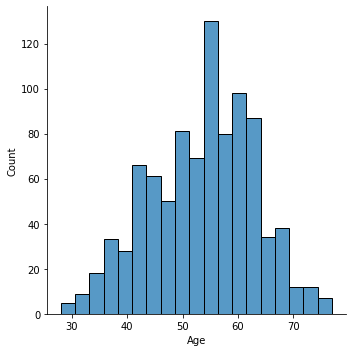

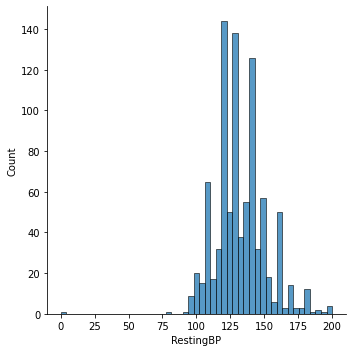

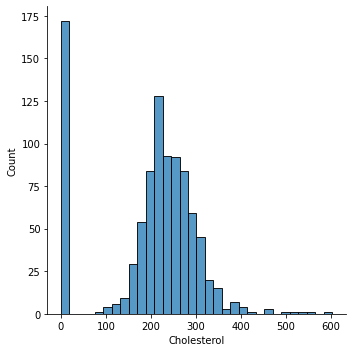

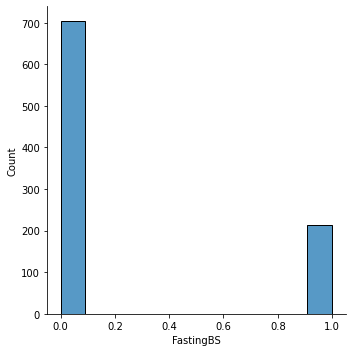

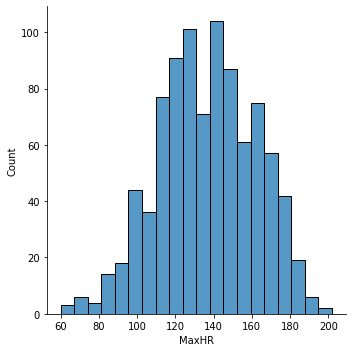

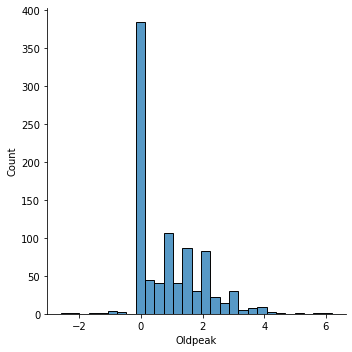

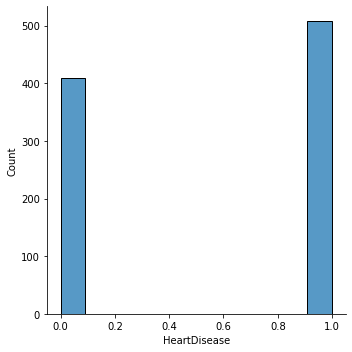

In [15]:
# Checking for outliers
for col in numerical_col:
  sns.displot(df[col])

In [16]:
numerical_col

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [17]:
for col in numerical_col:
  if col != 'HeartDisease' and col != 'FastingBS':
    df[col + '_score'] = (df[col] - df[col].mean()) / df[col].std()

In [18]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Age_score', 'RestingBP_score', 'Cholesterol_score',
       'MaxHR_score', 'Oldpeak_score'],
      dtype='object')

In [19]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_score,RestingBP_score,Cholesterol_score,MaxHR_score,Oldpeak_score
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,-0.902283,-1.209697,0.596068,-0.188897,0.293123
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,1.536064,0.626736,-0.053020,0.164595,2.355810
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,0.369898,-0.129442,-0.619830,-0.856602,0.293123
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0.369898,-0.129442,0.340090,1.460728,-0.831979
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0,-1.644389,0.302660,-0.217578,1.421452,-0.831979


In [20]:
# Outliers
df[(df['Age_score']<-3) | (df['Age_score'] > 3) | (df['RestingBP_score']<-3) | (df['RestingBP_score'] > 3) | (df['Cholesterol_score']<-3) | (df['Cholesterol_score'] > 3) | (df['MaxHR_score']<-3) | (df['MaxHR_score'] > 3) | (df['Oldpeak_score']<-3) | (df['Oldpeak_score'] > 3)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_score,RestingBP_score,Cholesterol_score,MaxHR_score,Oldpeak_score
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1,-2.280480,-0.777595,3.018723,-0.267450,-0.831979
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0,-1.538374,3.111322,0.385800,-1.210093,-0.831979
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1,0.051853,-0.129442,3.695238,-0.463834,0.105606
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1,-0.372208,0.410685,0.294379,0.125318,3.855945
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1,0.051853,3.651449,-0.007310,0.203871,1.043191
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1,-0.796268,-1.749824,-1.817444,-0.149620,-3.269699
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1,1.112004,3.651449,-1.817444,0.125318,0.105606
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1,-0.266193,0.410685,-1.817444,-3.016825,-0.831979
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1,0.793959,3.651449,-1.817444,-2.624057,-0.831979
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1,0.157868,-7.151097,-1.817444,0.714469,0.574398


In [21]:
new_df = df[(df['Age_score']>-3) & (df['Age_score']<3) & (df['RestingBP_score']>-3) & (df['RestingBP_score']<3) & (df['Cholesterol_score']>-3) & (df['Cholesterol_score']<3) & (df['MaxHR_score']>-3) & (df['MaxHR_score']<3) & (df['Oldpeak_score']>-3) & (df['Oldpeak_score']<3)]

In [22]:
new_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Age_score', 'RestingBP_score', 'Cholesterol_score',
       'MaxHR_score', 'Oldpeak_score'],
      dtype='object')

In [23]:
new_df = new_df.drop(['Age_score', 'RestingBP_score', 'Cholesterol_score',
       'MaxHR_score', 'Oldpeak_score'], axis=1)


# Encoding categorical columns

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
for col in categorical_col:
  if col != 'Sex' and col != 'ExerciseAngina':
    new_df[col + '_trans'] = le.fit_transform(new_df[col])
  else:
    new_df[col + '_trans'] = pd.get_dummies(new_df[col], drop_first=True)

In [26]:
new_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_trans,ChestPainType_trans,RestingECG_trans,ExerciseAngina_trans,ST_Slope_trans
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,1,0,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,2,1,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,1,2,0,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,1,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,2,1,0,2


In [27]:
final_df = new_df.drop(categorical_col,axis=1 )

In [28]:
final_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_trans,ChestPainType_trans,RestingECG_trans,ExerciseAngina_trans,ST_Slope_trans
0,40,140,289,0,172,0.0,0,1,1,1,0,2
1,49,160,180,0,156,1.0,1,0,2,1,0,1
2,37,130,283,0,98,0.0,0,1,1,2,0,2
3,48,138,214,0,108,1.5,1,0,0,1,1,1
4,54,150,195,0,122,0.0,0,1,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,3,1,0,1
914,68,144,193,1,141,3.4,1,1,0,1,0,1
915,57,130,131,0,115,1.2,1,1,0,1,1,1
916,57,130,236,0,174,0.0,1,0,1,0,0,1


# Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
X = final_df.drop('HeartDisease', axis=1)
y = final_df['HeartDisease']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_scaled = pd.DataFrame(scaler.fit_transform(X))

# Model Selection

In [33]:
from sklearn.svm import SVC
clf = SVC()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
from sklearn.model_selection import cross_val_score

In [34]:
cross_val_score(clf, X_scaled, y, cv=10, scoring='accuracy').mean()

0.8497877652933832

In [35]:
cross_val_score(lr, X_scaled, y, cv=10, scoring='accuracy').mean()

0.8308614232209738

In [45]:
cross_val_score(rfc, X_scaled, y, cv=10, scoring='accuracy').mean()

0.8586641697877653

In [44]:
cross_val_score(knc, X_scaled, y, cv=10, scoring='accuracy').mean()

0.8519850187265916

# Observation

### The Random Forest Classifier gives the best accuracy, with an average accuracy of 0.86%

# Principal Component Analysis

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=6)

In [40]:
new_X_scaled = pca.fit_transform(X_scaled)

In [41]:
pca.explained_variance_ratio_

array([0.31268251, 0.17916076, 0.13912634, 0.09580178, 0.07921732,
       0.06496804])

In [42]:
cross_val_score(rfc, new_X_scaled, y, cv=10, scoring='accuracy').mean()

0.8275280898876403

# Conclusion
### -After carry out the principal component analysis, the accuracy dropped to 82%
### - Also, we can improve the overall performance of the model by introducing more test and train samples.